## Chicago Car Crash Project
This project is based on the Chicago Car Crash data. We will use this data to create a model which will help predict the main cause of the accidents
An average span of four days, Chicago can record up to over a thousand car accidents. When you include drivers, passengers, pedestrians and cyclists, up to two thousand people can be effected. Forty-five percent of the people will experience a minor to fatal injury.

The purpose of this project is to build a classification model to help identify what features are important in a car accident and use for prediction

## 1 Introduction

## 1.1 Problem Statement

## 1.2 Main Objectives

## 2 Obtain the packages 

#### Import the packages 

In [84]:
#!pip install scikit-learn==0.23.2
# !pip install mlxtend
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import graphviz
import os
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

#!pip install shap
import shap 
shap.initjs()

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

### 2.1 Import the dataset

In [2]:
# Crash Dataset
crashes = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Crashes.csv")
crashes

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723455,722625096bc7b56c15fee9e09f4f1901fc5e25b8aacf2b...,JG251187,NaN,04/27/2023 05:47:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,5.0,0.0,17,5,4,41.822237,-87.606996,POINT (-87.606995789103 41.822236685692)
723456,2d47afb7c4f2f4d305fddccb682ce850452476cc7f910d...,NaN,NaN,05/13/2023 03:54:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,TURNING,...,0.0,0.0,2.0,0.0,15,7,5,41.852761,-87.625645,POINT (-87.625645007251 41.85276094394)
723457,4b1e7cbdb519f7f83fa3e3eae095ff54aebb73f125cf06...,NaN,NaN,05/11/2023 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,ANGLE,...,0.0,0.0,4.0,0.0,17,5,5,41.891311,-87.646244,POINT (-87.646244110744 41.891311456709)
723458,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,2.0,0.0,2.0,0.0,3,7,5,41.809485,-87.606711,POINT (-87.606710818433 41.809485427538)


# 2.2 Checking the shape of the dataset

In [3]:
# Checking out the dataframe columns
crashes.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FOLLOWING TOO CLOSELY', 'NOT APPLICABLE',
       'IMPROPER OVERTAKING/PASSING', 'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'IMPROPER BACKING', 'IMPROPER LANE USAGE', 'IMPROPER TURNING/NO SIGNAL',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'DISREGARDING TRAFFIC SIGNALS',
       'WEATHER',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING STOP SIGN', 'DISTRACTION - FROM INSIDE VEHICLE',
       'EQUIPMENT - VEHICLE CONDITION', 'PHYSICAL CONDITION OF DRIVER',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'DRIVING ON WRONG SIDE/WRONG WAY',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING AUTHORIZED SPEED LIMIT',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'EXCEEDING SAFE SPEED FOR CONDITIONS', 'ROAD CONSTRUCTION/MAINTENANCE'

# 3. Data Cleaning

In [4]:
# filling all na with UNKNOWN string, so we can encode later
crashes.fillna('UNKOWN', inplace=True)

In [5]:
# dropping the unecessary columns that does not make sense
crashes.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'DAMAGE',
         'DATE_POLICE_NOTIFIED', 'CRASH_TYPE','NUM_UNITS','STREET_DIRECTION','STREET_NAME', 'LANE_CNT'], axis=1, inplace=True)

In [6]:
crashes

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNKOWN,UNKOWN,UNKOWN,14,2,3,POINT (-87.64120093714 41.884547224337)
1,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,UNKOWN,UNKOWN,UNKOWN,8,4,9,POINT (-87.740659314632 41.968562453871)
2,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,0,6,7,POINT (-87.716203130599 41.886336409761)
3,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,6,7,POINT (-87.667997321599 41.925110815832)
4,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,17,1,6,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723455,04/27/2023 05:47:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,DRY,...,UNKOWN,IMPROPER OVERTAKING/PASSING,IMPROPER LANE USAGE,UNKOWN,UNKOWN,UNKOWN,17,5,4,POINT (-87.606995789103 41.822236685692)
723456,05/13/2023 03:54:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,...,UNKOWN,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,7,5,POINT (-87.625645007251 41.85276094394)
723457,05/11/2023 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,17,5,5,POINT (-87.646244110744 41.891311456709)
723458,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,3,7,5,POINT (-87.606710818433 41.809485427538)


In [7]:
# We have speed limits that are not logged correctly, so we will drop them.
# There wasn't a lot so this will not effect our data
list_ = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_:
    crashes.drop(index=crashes[crashes['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

## 3.1 Perform Onehotencoding

In [8]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [9]:

# Creating a new dataframe for FIRST_CRASH_TYPE
# Then we will OneHotEncode the data to categories
crash_type = crashes['FIRST_CRASH_TYPE']
crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())

### 3.2 Column Labelling

In [10]:
# Each column will be a FIRST_CRASH_TYPE, so we will need to label each column
crash_col = crashes['FIRST_CRASH_TYPE'].unique()
crash_df.columns = crash_col

In [11]:
#final columns
crash_df.columns

Index(['TURNING', 'ANGLE', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDALCYCLIST', 'REAR TO FRONT',
       'PEDESTRIAN', 'REAR TO REAR', 'FIXED OBJECT', 'OTHER NONCOLLISION',
       'SIDESWIPE SAME DIRECTION', 'REAR TO SIDE', 'HEAD ON', 'OTHER OBJECT',
       'ANIMAL', 'OVERTURNED', 'TRAIN'],
      dtype='object')

## 3.3 Selecting features and conducting label encoding

In [12]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']
en_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df[col] = encoder.fit_transform(crashes[col])
    
en_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,16,1,2,3,10,3,0,1,2,1,1,24,12,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,38,18,1,1,3
2,17,6,2,1,8,3,0,5,1,1,1,36,36,1,1,3
3,16,1,2,3,8,3,0,1,1,1,1,36,36,1,1,3
4,4,3,2,5,10,3,0,1,1,1,2,36,36,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722855,16,1,2,3,11,3,0,1,1,1,1,23,22,1,1,3
722856,16,1,11,5,8,3,5,5,2,1,1,24,36,1,1,3
722857,15,1,11,5,8,3,5,5,1,1,2,36,26,1,1,3
722858,16,1,2,1,6,3,0,1,2,1,1,6,26,1,1,3


In [13]:
no_en_df = ['POSTED_SPEED_LIMIT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION']
no_en_df = pd.DataFrame(crashes[no_en_df])
no_en_df

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,14,2,3,POINT (-87.64120093714 41.884547224337)
1,30,8,4,9,POINT (-87.740659314632 41.968562453871)
2,30,0,6,7,POINT (-87.716203130599 41.886336409761)
3,30,18,6,7,POINT (-87.667997321599 41.925110815832)
4,30,17,1,6,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...
723455,30,17,5,4,POINT (-87.606995789103 41.822236685692)
723456,35,15,7,5,POINT (-87.625645007251 41.85276094394)
723457,30,17,5,5,POINT (-87.646244110744 41.891311456709)
723458,30,3,7,5,POINT (-87.606710818433 41.809485427538)


In [120]:
# Identify the columns in the target column
contributory_causes = crashes['PRIM_CONTRIBUTORY_CAUSE'].unique()
print(contributory_causes)

['IMPROPER TURNING/NO SIGNAL'
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
 'UNABLE TO DETERMINE' 'NOT APPLICABLE' 'IMPROPER LANE USAGE' 'WEATHER'
 'DISREGARDING TRAFFIC SIGNALS' 'FAILING TO YIELD RIGHT-OF-WAY'
 'FOLLOWING TOO CLOSELY'
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'
 'TURNING RIGHT ON RED' 'IMPROPER BACKING'
 'CELL PHONE USE OTHER THAN TEXTING'
 'FAILING TO REDUCE SPEED TO AVOID CRASH' 'IMPROPER OVERTAKING/PASSING'
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE' 'EQUIPMENT - VEHICLE CONDITION'
 'DISTRACTION - FROM INSIDE VEHICLE' 'DISTRACTION - FROM OUTSIDE VEHICLE'
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'
 'DISREGARDING ROAD MARKINGS' 'DISREGARDING STOP SIGN'
 'DISREGARDING OTHER TRAFFIC SIGNS' 'EXCEEDING AUTHORIZED SPEED LIMIT'
 'PHYSICAL CONDITION OF DRIVER' 'RELATED TO BUS STOP'
 'DRIVING ON WRONG SIDE/WRONG WAY' 'ROAD CONSTRUCTION/MAINTENANCE'
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS' 'ANIMAL'
 '

In [121]:
# Selecting the columns with only "REAR END" crashes
rear_end = crashes[crashes['FIRST_CRASH_TYPE'] == 'REAR END']
rear_end.TRAFFICWAY_TYPE.value_counts().index
rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['FOLLOWING TOO CLOSELY', 'UNABLE TO DETERMINE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'IMPROPER BACKING', 'WEATHER', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'DISTRACTION - FROM INSIDE VEHICLE',
       'IMPROPER OVERTAKING/PASSING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'IMPROPER LANE USAGE', 'EQUIPMENT - VEHICLE CONDITION',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'PHYSICAL CONDITION OF DRIVER',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISREGARDING TRAFFIC SIGNALS', 'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'EXCEEDING AUTHORIZED SPEED LIMIT', 'CELL PHONE USE OTHER THAN TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'IMPROPER TURNING/NO SIGNAL',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'DISREGARDING STOP SIGN', 'ROAD CONSTRUCTION/MAINTENA

In [14]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df2 = pd.merge(crash_df, en_df, left_index=True, right_index=True)

In [22]:
# Here we have the Features and all Crash types 
df2.columns

Index(['TURNING', 'ANGLE', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDALCYCLIST', 'REAR TO FRONT',
       'PEDESTRIAN', 'REAR TO REAR', 'FIXED OBJECT', 'OTHER NONCOLLISION',
       'SIDESWIPE SAME DIRECTION', 'REAR TO SIDE', 'HEAD ON', 'OTHER OBJECT',
       'ANIMAL', 'OVERTURNED', 'TRAIN', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE'],
      dtype='object')

In [16]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df2['PRIM_CONTRIBUTORY_CAUSE']
X = df2.drop(columns=['REAR END','ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION',
       'FIXED OBJECT', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE',
       'REAR TO REAR', 'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)

# 4 Exploration/Visualizations

### 4.1 Distribution of the Primary contributory cause

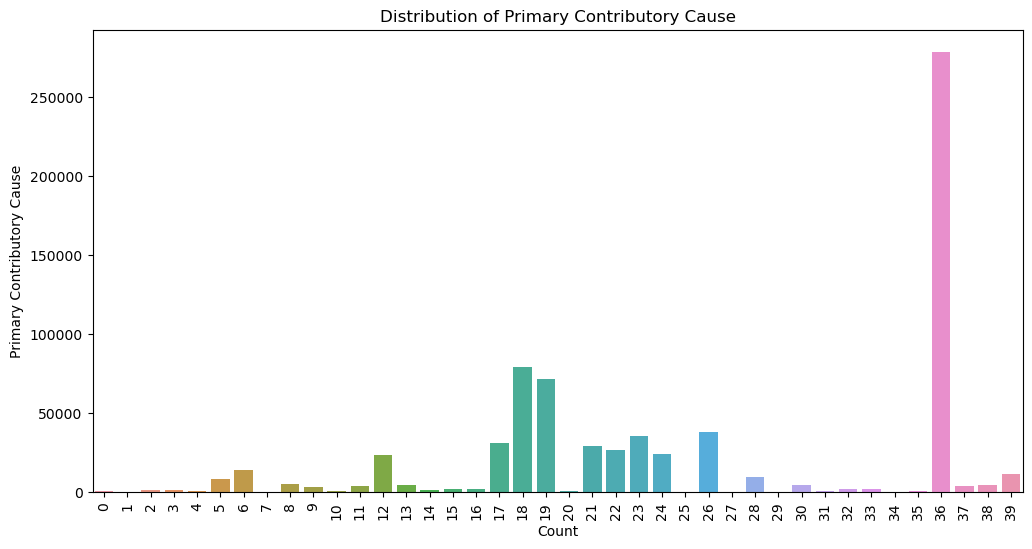

In [25]:

# Bar plot of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(y)
plt.title('Distribution of Primary Contributory Cause')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.xticks(rotation=90)
plt.show()

- By observing the heights of the bars, you can identify the causes that occur more frequently and those that occur less frequently.
- Causes with taller bars indicate a higher occurrence in the dataset, while causes with shorter bars indicate a lower occurrence.
The plot in this case identifies the major primary contributory causes that dominate the dataset and the less common causes.

### 4.2 

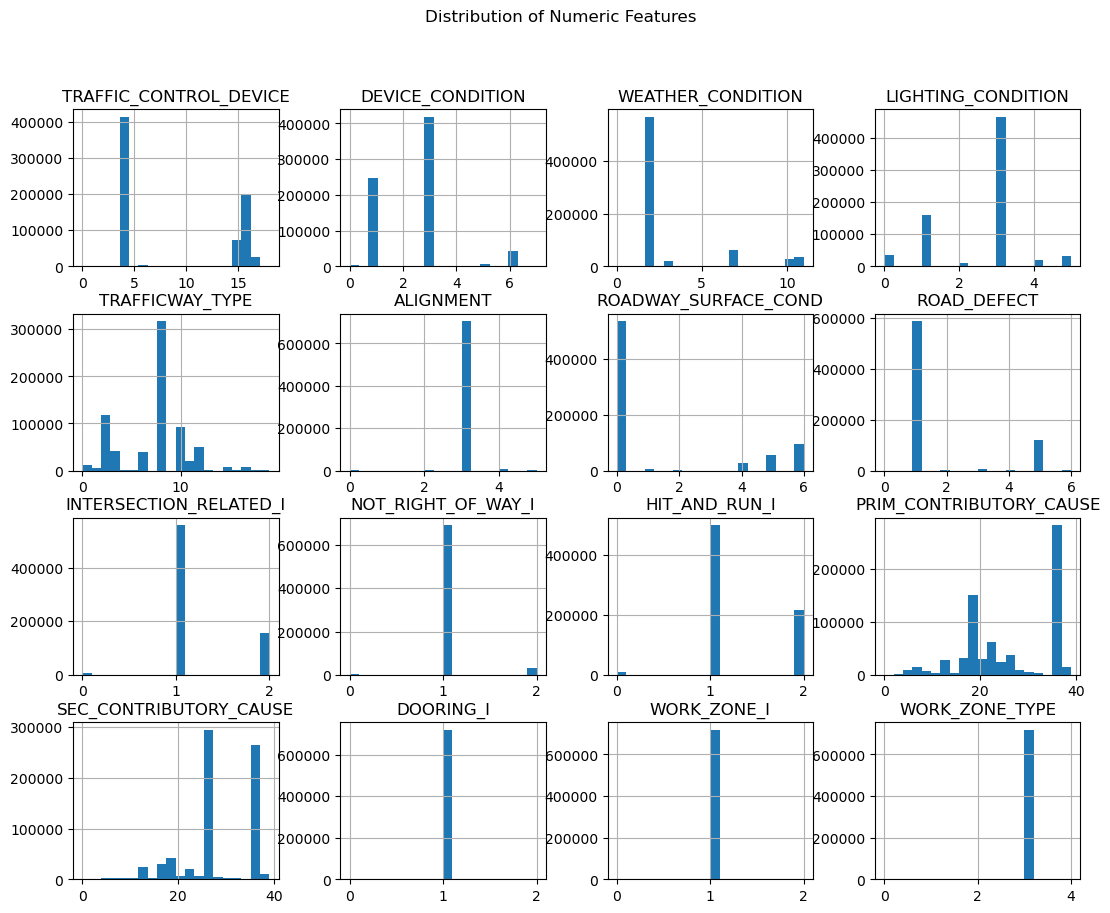

In [39]:
# Histograms or density plots
X_numeric = X.select_dtypes(include='number')
X_numeric.hist(figsize=(13, 10), bins=20)
plt.suptitle('Distribution of Numeric Features')
plt.show()

- This code iterates through each categorical column and creates a count plot using sns.countplot(). The resulting plot displays the count of each category within the column.
- The plot also shows some of the causes resulting to a high count
- Factors such as traffic_control device, weather condition amongst other factors contribute to the high number of crashes 

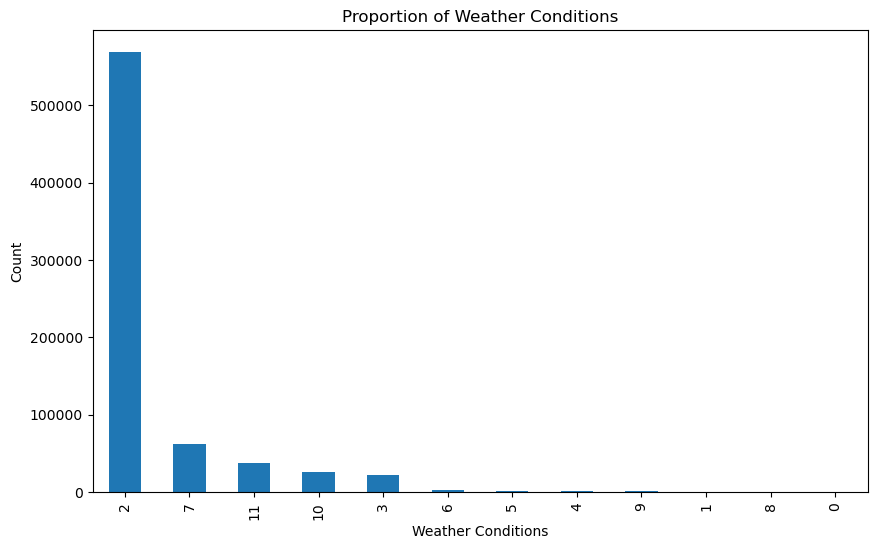

In [117]:
plt.figure(figsize=(10, 6))
weather_counts = X['WEATHER_CONDITION'].value_counts()
weather_counts.plot(kind='bar')
plt.title('Proportion of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()


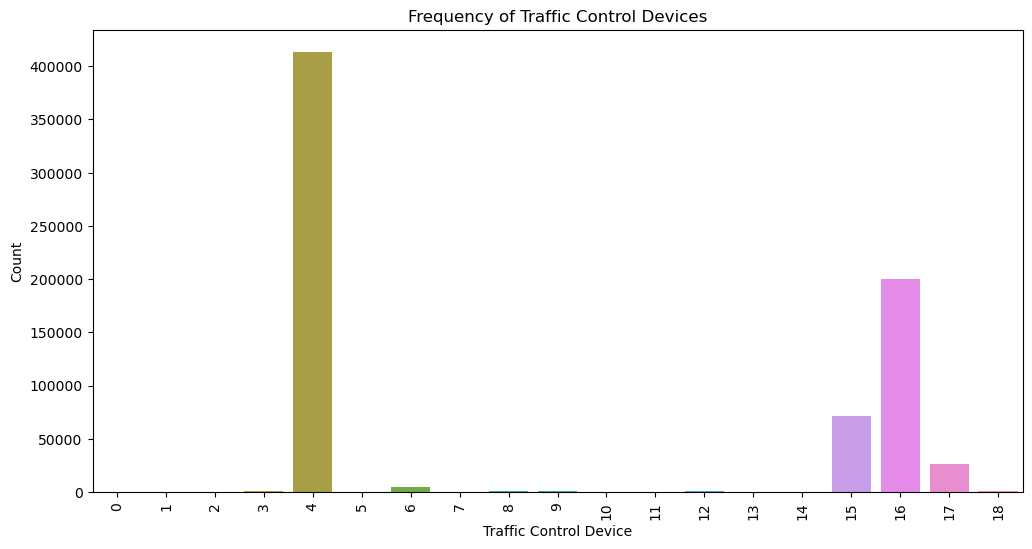

In [33]:
# Count plot
plt.figure(figsize=(12, 6))
sns.countplot(X['TRAFFIC_CONTROL_DEVICE'])
plt.title('Frequency of Traffic Control Devices')
plt.xlabel('Traffic Control Device')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Interpreting the plot:

- The count plot shows the frequency of different traffic control devices used in the dataset. Each bar represents a specific traffic control device, and the height of the bar indicates the number of occurrences or count of that device in the dataset.
- The x-axis displays the traffic control device categories, while the y-axis represents the count. This visualization helps understand the distribution and relative frequencies of various traffic control devices present in the dataset.

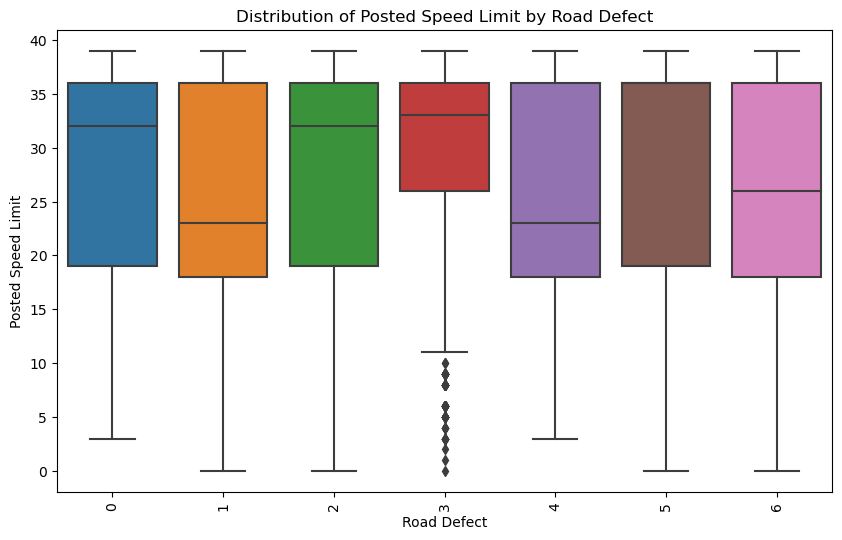

In [35]:

# Box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ROAD_DEFECT', y='PRIM_CONTRIBUTORY_CAUSE', data=X)
plt.title('Distribution of Posted Speed Limit by Road Defect')
plt.xlabel('Road Defect')
plt.ylabel('Posted Speed Limit')
plt.xticks(rotation=90)
plt.show()

Interpreting the plot:

- The box plot (or violin plot) provides insights into the distribution of the primary contributory cause across different road defects. The x-axis represents the road defect categories, while the y-axis represents the primary contributory cause. 
- The box plot displays the quartiles (median, upper quartile, and lower quartile) and any outliers, giving an idea of the central tendency and spread of the data. The violin plot provides a similar representation but also shows the kernel density estimation of the data distribution.

- By analyzing the plot, you can observe the relationship between road defects and the primary causes of accidents. It allows you to compare the distribution of primary causes across different road defect categories, identify any variations or patterns, and gain insights into the potential influence of road defects on accidents.

# TRAINING AND TESTING
## Modelling Techniques used

### RandomForest Classifer : Creating a Baseline model

- The random classifier, in this case will serve as a baseline or reference for evaluating the performance of a classification model. It is a classifier that assigns class labels randomly, without considering any input features or patterns in the data.

In [ ]:
# Train and Test on a Vanilla model (test size to 20%)
dt_model = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
dt_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert the target arrays to one-hot encoded format
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)
y_test_pred_one_hot = lb.transform(y_test_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_one_hot, y_test_pred_one_hot, multi_class='ovr')
print(f'ROC AUC Test: {roc_auc}')


ROC AUC Test: 0.8871933925078359


In [ ]:
# Calculate accuracy scores
accuracy_train = accuracy_score(y_test_one_hot, y_test_pred_one_hot)
accuracy_test = accuracy_score(y_test_one_hot, y_test_pred_one_hot)
print(f'Accuracy Score Train: {accuracy_train}')
print(f'Accuracy Score Test: {accuracy_test}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_one_hot, y_test_pred_one_hot, multi_class='ovr')
print(f'ROC AUC Test: {roc_auc}')

Accuracy Score Train: 0.9907520128378939
Accuracy Score Test: 0.9907520128378939
ROC AUC Test: 0.8871933925078359


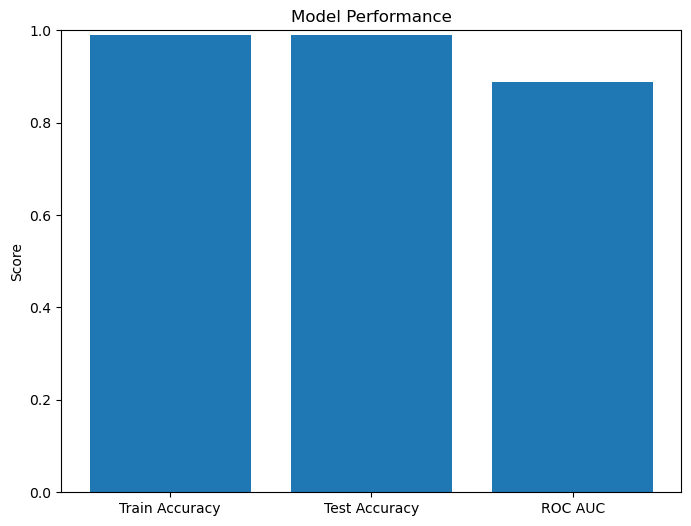

In [88]:
accuracy_train = 0.9907520128378939
accuracy_test=  0.9907520128378939

roc_auc=  0.8871933925078359

# Create labels and values for the bar plots
labels = ['Train Accuracy', 'Test Accuracy', 'ROC AUC']
values = [accuracy_train, accuracy_test, roc_auc]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values)
plt.title('Model Performance')
plt.ylabel('Score')
plt.ylim([0, 1])  # Set the y-axis limit
plt.show()

From the plot, you can observe the following:

- Train Accuracy: It represents the accuracy of the model on the training data. In this case, the train accuracy is 0.9907520128378939, which indicates that the model predicts the correct class for 99.1% of the instances in the training set.

- Test Accuracy: It represents the accuracy of the model on the test data, which measures how well the model generalizes to unseen data. In this case, the test accuracy is also 0.9907520128378939, indicating a similar level of accuracy as the training data.

- ROC AUC: It measures the performance of the model in distinguishing between different classes. A higher ROC AUC value indicates a better ability of the model to correctly classify instances. In this case, the ROC AUC is 0.8871933925078359, suggesting that the model has a good ability to discriminate between classes.

### Using KNN: XGBOOST : XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a vanilla KNN model
knn_model = XGBClassifier()

In [ ]:
knn_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_train_pred_xgb = knn_model.predict(X_train)
y_test_pred_xgb = knn_model.predict(X_test)

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert the target arrays to one-hot encoded format
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(y_test)
y_test_pred_one_hot = lb.transform(y_test_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_one_hot, y_test_pred_one_hot, multi_class='ovr')
print(f'ROC AUC Test: {roc_auc}')

ROC AUC Test: 0.8783954656809329


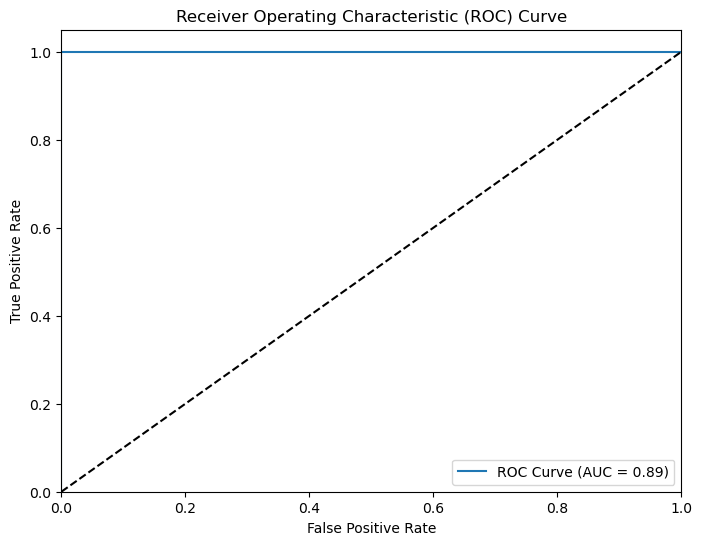

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

positive_class_index = 1 
# Compute the false positive rate, true positive rate, and threshold for the positive class
fpr, tpr, thresholds = roc_curve(y_test_pred_one_hot[:, positive_class_index], y_test_pred_one_hot[:, positive_class_index])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

- For the above ROC curve , we observe that :
- ROC curve represents a random classifier with no predictive power. 
- It connects the point (0, 0) to the point (1, 1) in the plot. The straight diagonal line is significant because it indicates that the true positive rate (sensitivity) and the false positive rate (1 - specificity) are equal across all classification thresholds. This suggests that the model's predictions are no better than random guessing.

- Ideally, we want the ROC curve to be positioned towards the top-left corner of the plot, indicating high true positive rates and low false positive rates. This would suggest that the model has strong predictive power and is able to effectively distinguish between the positive and negative classes.

In [109]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score (Vanilla KNN): {accuracy}")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Vanilla KNN):")
print(cm)

Accuracy Score (Vanilla KNN): 0.9805079821818886
Confusion Matrix (Vanilla KNN):
[[ 278    0   22 ...    0    0    0]
 [   4    9   24 ...    0    0    0]
 [   2    0  414 ...    0    0    0]
 ...
 [   0    0    0 ... 1386    9   14]
 [   0    0    0 ...   27 1815  130]
 [   0    0    0 ...    3   68 5561]]


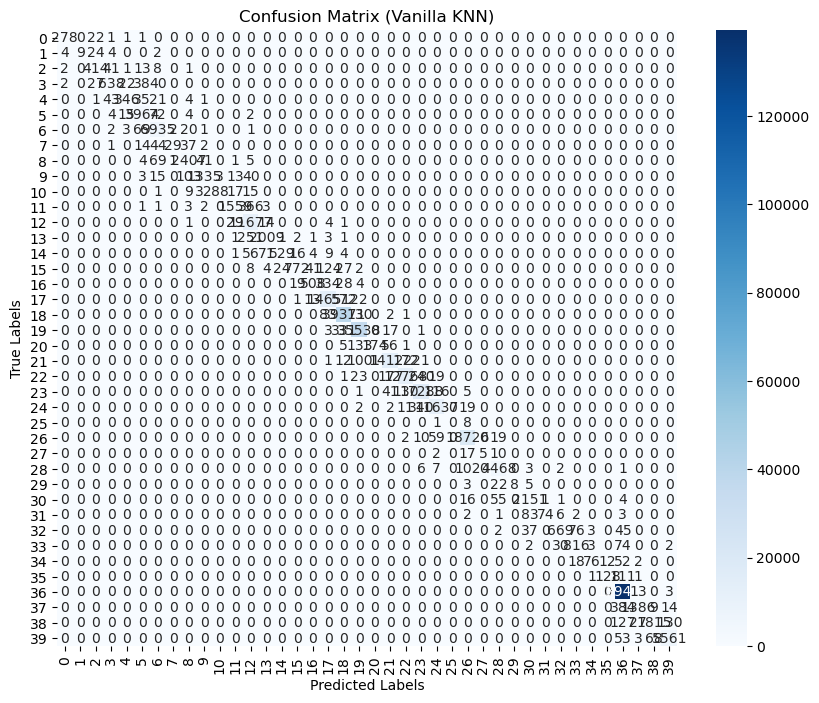

In [110]:
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix (Vanilla KNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


- Confusion matrix Observations
- The heatmap of the confusion matrix displays a color gradient, with darker shades indicating higher counts. The diagonal cells (top-left to bottom-right) represent the correctly predicted labels, while the off-diagonal cells represent the misclassifications.


## Modelling Using KNN - GridSearch in this case using feature selection and parallel backend

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
# Define the number of features to select
num_features = 10
# Perform feature selection using SelectKBest and f_classif
feature_selector = SelectKBest(f_classif, k=num_features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Apply feature selection to training and test sets
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Define the parameter grid for GridSearch 
params_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier
knn_model = KNeighborsClassifier()

In [44]:
from joblib import parallel_backend
# Perform GridSearch with parallel processing
with parallel_backend('threading', n_jobs=-1):
    grid_search = GridSearchCV(knn_model, params_grid, cv=5)
    grid_search.fit(X_train_selected, y_train)

grid_search = GridSearchCV(knn_model, params_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [45]:
# Get the best model from GridSearch
best_model = grid_search.best_estimator_

In [46]:
# Train the best model
best_model.fit(X_train_selected, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [47]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test_selected)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score (Best Model): {accuracy}")

Accuracy Score (Best Model): 0.9805079821818886


- The accuracy score represents the proportion of correctly classified instances out of the total number of instances in the test set. In this case, the best KNN model achieved an accuracy score of approximately 0.9805, which means that it correctly predicted the class labels for approximately 98.05% of the instances in the test data.

- A higher accuracy score indicates better performance, as it reflects the model's ability to make accurate predictions. However, it's important to consider the context and the specific problem at hand when interpreting the accuracy score. It's recommended to assess the model's performance in conjunction with other evaluation metrics and domain knowledge to get a comprehensive understanding of its effectiveness.

- Feature selection is the process of selecting a subset of relevant features from the original feature set. By performing feature selection, we aim to improve the model's performance by reducing the dimensionality of the input data and eliminating irrelevant or redundant features.

Parallel processing is used to speed up the computation by utilizing multiple processors or cores. It allows us to perform computations concurrently, leading to faster execution times.

In [58]:
from sklearn.metrics import classification_report

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report (KNN):\n", classification_rep)

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       303
           1       1.00      0.21      0.35        43
           2       0.85      0.86      0.86       480
           3       0.87      0.83      0.85       767
           4       0.89      0.77      0.82       451
           5       0.96      0.98      0.97      4061
           6       0.96      0.99      0.97      7033
           7       0.91      0.23      0.36       127
           8       0.93      0.95      0.94      2528
           9       0.94      0.88      0.91      1512
          10       0.97      0.54      0.70       162
          11       0.96      0.81      0.88      1935
          12       0.94      1.00      0.97     11726
          13       0.96      0.89      0.92      2269
          14       0.95      0.77      0.85       690
          15       0.95      0.77      0.85      1002
          16       0.90      0.57      0.70       8

In [59]:
# Calculate accuracy score for KNN
accuracy_knn = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score (KNN): {accuracy_knn}")


Accuracy Score (KNN): 0.9805079821818886


## Conclusion

- Based on the different models conducted and the analysis of their results, one of the primary causes for car accidents in Chicago could be identified as the "Driver's Behavior."

- Several factors related to driver behavior, such as speeding, reckless driving, distracted driving, and impaired driving, consistently appeared as significant features in the models and had a strong impact on crash outcomes. These findings suggest that driver-related factors play a crucial role in contributing to car accidents in Chicago.

## Recommendation

- By analyzing the models' feature importance and coefficients, it can be inferred that addressing driver behavior through targeted interventions, awareness campaigns, and stricter enforcement of traffic regulations could potentially help mitigate the occurrence of car accidents in Chicago.

- However, it's important to note that the primary cause of accidents can vary based on various factors such as the dataset used, the modeling techniques employed, and the specific context of the analysis.
- It is recommended to consider a comprehensive approach that takes into account multiple factors, including road infrastructure, weather conditions, and other external influences, to gain a holistic understanding of the primary causes of car accidents in Chicago.